In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df= pd.read_excel('Project 3_Data Visualization of Bird Strikes between 2000 – 2011.xlsx')
df.shape

(25558, 26)

<font color='Green'>Renaming columms (: to _)

In [98]:
for col in df.columns:
    if ": " in col:
        df.rename(columns={col: col.replace(": ", "_")}, inplace=True)
df.columns

Index(['Record ID', 'Aircraft_Type', 'Airport_Name', 'Altitude bin',
       'Aircraft_Make/Model', 'Wildlife_Number struck',
       'Wildlife_Number Struck Actual', 'Effect_Impact to flight',
       'FlightDate', 'Effect_Indicated Damage', 'Aircraft_Number of engines?',
       'Aircraft_Airline/Operator', 'Origin State', 'When_Phase of flight',
       'Conditions_Precipitation', 'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife_Size',
       'Conditions_Sky', 'Wildlife_Species',
       'Pilot warned of birds or wildlife?', 'Cost_Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [99]:
df.isnull().sum()

Record ID                                     0
Aircraft_Type                               129
Airport_Name                                129
Altitude bin                                129
Aircraft_Make/Model                           0
Wildlife_Number struck                      129
Wildlife_Number Struck Actual                 0
Effect_Impact to flight                     129
FlightDate                                  129
Effect_Indicated Damage                       0
Aircraft_Number of engines?                 267
Aircraft_Airline/Operator                   129
Origin State                                449
When_Phase of flight                        129
Conditions_Precipitation                      0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife_Size                               129
Conditions_Sky                                0
Wildlife_Species                        

In [100]:
(df.isnull().sum().values/df.shape[0])*100

array([ 0.        ,  0.50473433,  0.50473433,  0.50473433,  0.        ,
        0.50473433,  0.        ,  0.50473433,  0.50473433,  0.        ,
        1.04468268,  0.50473433,  1.75678848,  0.50473433,  0.        ,
        0.        ,  0.        , 18.66734486,  0.50473433,  0.        ,
        0.        ,  0.50473433,  0.        ,  0.50473433,  0.        ,
        0.50473433])

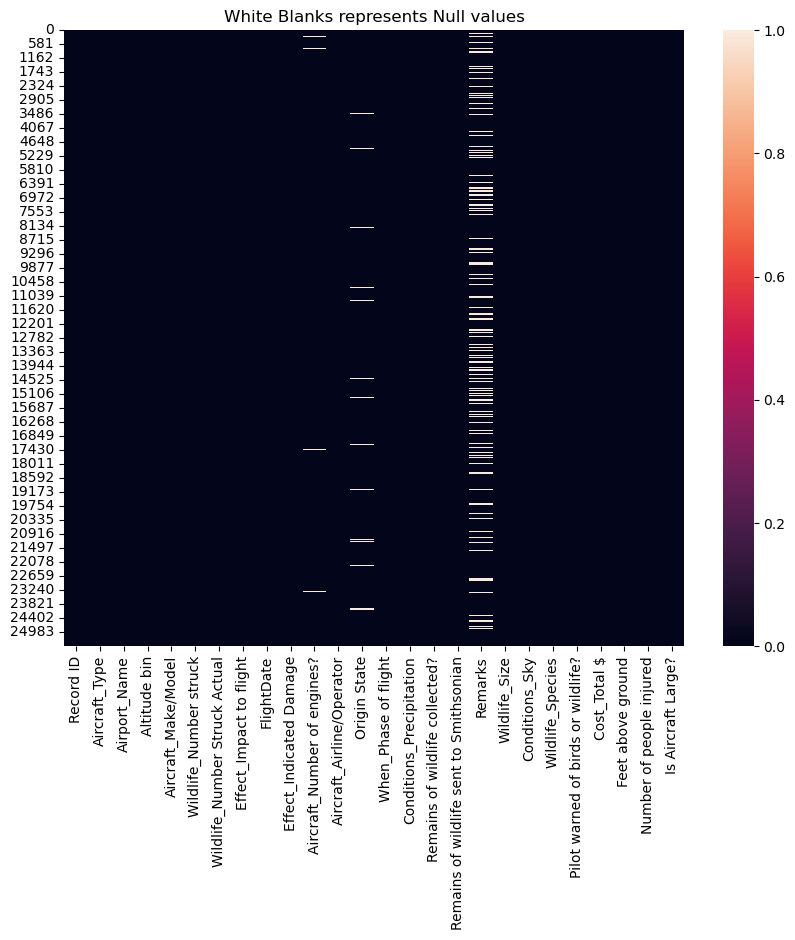

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('White Blanks represents Null values')
plt.show()

In [102]:
def per_list(ele, total):
    return round(((ele/total)*100),2)
## Defining a function named "per_list" to calculate the percentage of Null values in all the columns of dataframe df

In [103]:
per_dict = {col: per_list(df[col].isnull().sum(), df.shape[0]) for col in df}
{col: percent for col, percent in per_dict.items() if percent>1}

## Saving the sum of Null values for each column, in a dictionary named "per_dict" and then printing only the columns 
## having Null values percentage greater then 1

{'Aircraft_Number of engines?': 1.04, 'Origin State': 1.76, 'Remarks': 18.67}

In [104]:
## creating a new DataFrame "df_copy" that contain a copy of DataFrame "df"


<font color='green'>Columns "Aircraft: Number of engines?" and "Origin State" have Null values percentage less then 2 so its good to remove rows containing Null values as it will not affect the analysis much.
<br>The column "Remarks" has Null values percentage more then 18% but this column has no significant information that can be analysed so its good to drop the Remarks column.

In [105]:
df.dropna(inplace=True)

In [106]:
df.drop(columns= ['Remarks'], inplace=True)

In [107]:
df['Aircraft_Type'].value_counts()

Airplane    20142
Name: Aircraft_Type, dtype: int64

In [108]:
df['Aircraft_Type'].isnull().sum()

0

In [109]:
df['Airport_Name'].nunique()

927

In [110]:
df['Altitude bin'].value_counts()

< 1000 ft    16281
> 1000 ft     3861
Name: Altitude bin, dtype: int64

In [111]:
df['Wildlife_Number struck'].value_counts()

1            16172
2 to 10       3678
11 to 100      286
Over 100         6
Name: Wildlife_Number struck, dtype: int64

In [112]:
df['Origin State'].nunique()

59

In [113]:
df['Origin State'].unique()

array(['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', 'DC',
       'Florida', 'California', 'Illinois', 'Missouri', 'Rhode Island',
       'Hawaii', 'Arizona', 'Tennessee', 'South Carolina', 'South Dakota',
       'New Jersey', 'Colorado', 'Minnesota', 'Alabama', 'Georgia',
       'Ohio', 'Wisconsin', 'Michigan', 'Massachusetts', 'Alaska',
       'North Carolina', 'Indiana', 'Kentucky', 'Oregon', 'Pennsylvania',
       'New Hampshire', 'Arkansas', 'Nevada', 'Mississippi', 'Maryland',
       'Maine', 'Quebec', 'Idaho', 'Utah', 'Nebraska', 'Iowa',
       'British Columbia', 'New Mexico', 'Connecticut', 'West Virginia',
       'Delaware', 'Vermont', 'Wyoming', 'Kansas', 'Oklahoma',
       'North Dakota', 'Montana', 'Puerto Rico', 'Ontario',
       'Prince Edward Island', 'Newfoundland and Labrador',
       'Virgin Islands', 'Alberta'], dtype=object)

In [114]:
df.select_dtypes(include='object').columns
#df.dtypes=='object'

Index(['Aircraft_Type', 'Airport_Name', 'Altitude bin', 'Aircraft_Make/Model',
       'Wildlife_Number struck', 'Effect_Impact to flight',
       'Effect_Indicated Damage', 'Aircraft_Number of engines?',
       'Aircraft_Airline/Operator', 'Origin State', 'When_Phase of flight',
       'Conditions_Precipitation', 'Wildlife_Size', 'Conditions_Sky',
       'Wildlife_Species', 'Pilot warned of birds or wildlife?',
       'Is Aircraft Large?'],
      dtype='object')

In [115]:
res2= df.nunique().reset_index()[df.nunique().reset_index()[0]<10]
print(res2)
for col in res2['index']:
    print(df[col].value_counts(), "\n")

                                      index  0
1                             Aircraft_Type  1
3                              Altitude bin  2
5                    Wildlife_Number struck  4
7                   Effect_Impact to flight  5
9                   Effect_Indicated Damage  2
10              Aircraft_Number of engines?  5
13                     When_Phase of flight  7
14                 Conditions_Precipitation  8
15           Remains of wildlife collected?  2
16  Remains of wildlife sent to Smithsonian  2
17                            Wildlife_Size  3
18                           Conditions_Sky  3
20       Pilot warned of birds or wildlife?  2
23                 Number of people injured  4
24                       Is Aircraft Large?  2
Airplane    20142
Name: Aircraft_Type, dtype: int64 

< 1000 ft    16281
> 1000 ft     3861
Name: Altitude bin, dtype: int64 

1            16172
2 to 10       3678
11 to 100      286
Over 100         6
Name: Wildlife_Number struck, dtype: int64 



In [116]:
df["Is Aircraft Large?"].value_counts()

No     13352
Yes     6790
Name: Is Aircraft Large?, dtype: int64

In [117]:
df['Number of people injured'].value_counts()

0    20129
1        9
2        3
6        1
Name: Number of people injured, dtype: int64

In [118]:
df['Pilot warned of birds or wildlife?'].value_counts()

N    11020
Y     9122
Name: Pilot warned of birds or wildlife?, dtype: int64

In [119]:
df['FlightDate'].dtypes

dtype('<M8[ns]')

In [120]:
df['FlightDate']= pd.to_datetime(df['FlightDate'])
df['FlightDate'].dtypes

dtype('<M8[ns]')

In [121]:
df['Year_of_Flight']= df['FlightDate'].dt.year.astype('object')
df['Year_of_Flight'].nunique()

12

In [122]:
#df.groupby(['Year_of_Flight', 'Wildlife: Number struck'])['Record ID'].count()

In [123]:
df.columns

Index(['Record ID', 'Aircraft_Type', 'Airport_Name', 'Altitude bin',
       'Aircraft_Make/Model', 'Wildlife_Number struck',
       'Wildlife_Number Struck Actual', 'Effect_Impact to flight',
       'FlightDate', 'Effect_Indicated Damage', 'Aircraft_Number of engines?',
       'Aircraft_Airline/Operator', 'Origin State', 'When_Phase of flight',
       'Conditions_Precipitation', 'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife_Size',
       'Conditions_Sky', 'Wildlife_Species',
       'Pilot warned of birds or wildlife?', 'Cost_Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year_of_Flight'],
      dtype='object')

In [124]:
df['Year_of_Flight']

0        2000
1        2001
2        2001
3        2002
4        2003
         ... 
25551    2011
25552    2011
25553    2011
25556    2011
25557    2011
Name: Year_of_Flight, Length: 20142, dtype: object

In [125]:
df['Year_of_Flight']= df['Year_of_Flight'].astype('object')

In [126]:
df['Year_of_Flight'].dtypes

dtype('O')

## Analysis 

In [133]:
df.columns

Index(['Record ID', 'Aircraft_Type', 'Airport_Name', 'Altitude bin',
       'Aircraft_Make/Model', 'Wildlife_Number struck',
       'Wildlife_Number Struck Actual', 'Effect_Impact to flight',
       'FlightDate', 'Effect_Indicated Damage', 'Aircraft_Number of engines?',
       'Aircraft_Airline/Operator', 'Origin State', 'When_Phase of flight',
       'Conditions_Precipitation', 'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife_Size',
       'Conditions_Sky', 'Wildlife_Species',
       'Pilot warned of birds or wildlife?', 'Cost_Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year_of_Flight'],
      dtype='object')

In [137]:
df.groupby('Year_of_Flight')['Record ID'].count().values

array([ 948,  879, 1252, 1236, 1340, 1421, 1642, 1844, 1817, 2734, 2585,
       2444], dtype=int64)

In [139]:
df.groupby('Year_of_Flight')['Record ID'].count().values

array([ 948,  879, 1252, 1236, 1340, 1421, 1642, 1844, 1817, 2734, 2585,
       2444], dtype=int64)

### Yearly analysis of Bird Strikes 

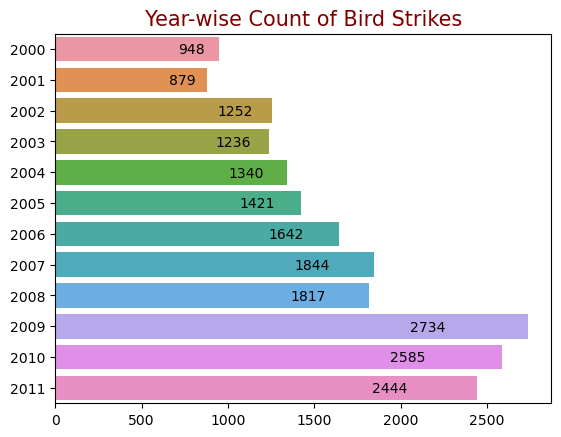

In [180]:
sns.countplot(data=df, y='Year_of_Flight')
for idx, patch in enumerate(plt.gca().patches):
    count= patch.get_width()
    plt.annotate(count, xy=(count*.75, idx+.15))
plt.title('Year-wise Count of Bird Strikes', color='maroon', size=15)
plt.xlabel(''); plt.ylabel('')
plt.show()

<font color='green' size=4>The number of bird strike incidents shows a positive trend from 2000 to 2008, with a notable spike in 2009. However, there is a slight decline in the following two years.

### Top 10 US Airlines with highest encounters of bird strikes 

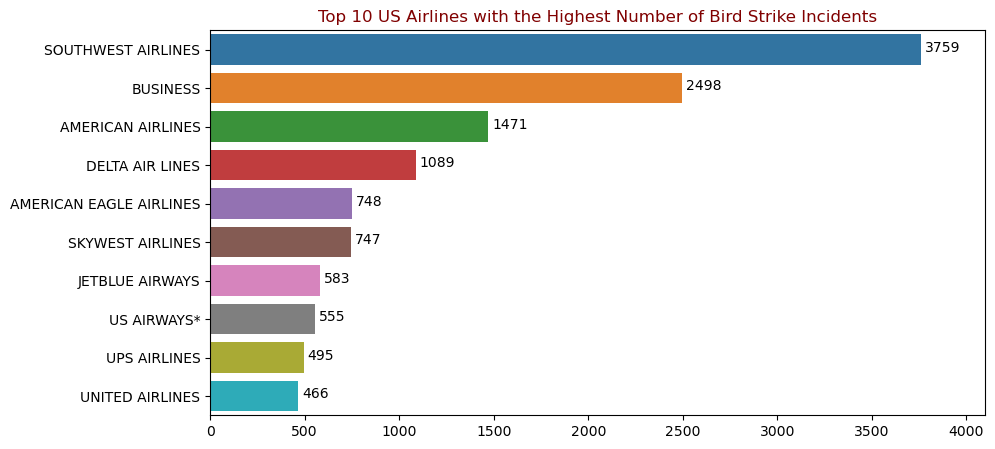

In [182]:
plt.figure(figsize=(10,5))
res3= df['Aircraft_Airline/Operator'].value_counts().sort_values(ascending=False).reset_index().head(10)
sns.barplot(data=res3, y="index", x='Aircraft_Airline/Operator', orient='h')
for idx, value in enumerate(res3['Aircraft_Airline/Operator']):
    plt.annotate(value, xy=(value+20, idx+.05))

plt.title('Top 10 US Airlines with the Highest Number of Bird Strike Incidents', color='maroon', size=12)
plt.ylabel(""); plt.xlabel(""); plt.xlim(0, 4100)
plt.show()

### Airports with most incidents of bird strikes – Top 50

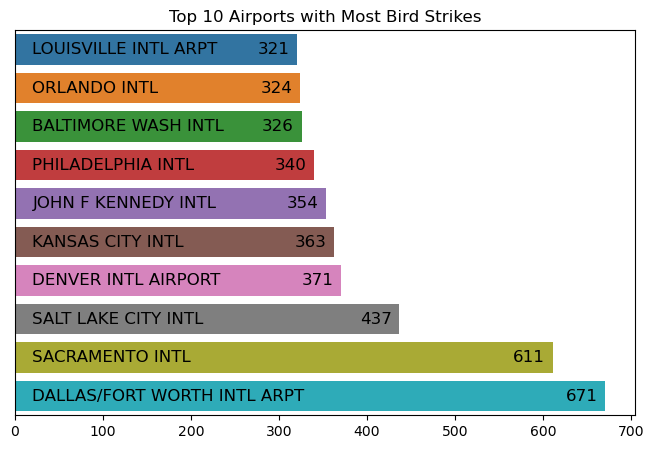

In [154]:
top_airports = df.groupby('Airport_Name')['Record ID'].count().nlargest(10).sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=top_airports.values, y=top_airports.index, orient='h')
for idx, val in enumerate(top_airports.index):
    plt.text(20,idx+.12, val, size=12)
for idx, val in enumerate(top_airports.values):
    plt.text(val-45, idx+.12, val, size=12)
    
plt.xlabel(""); plt.ylabel(''); plt.yticks([]); plt.ylim()
plt.title('Top 10 Airports with Most Bird Strikes')
plt.show()

### Yearly Cost Incurred due to Bird Strikes

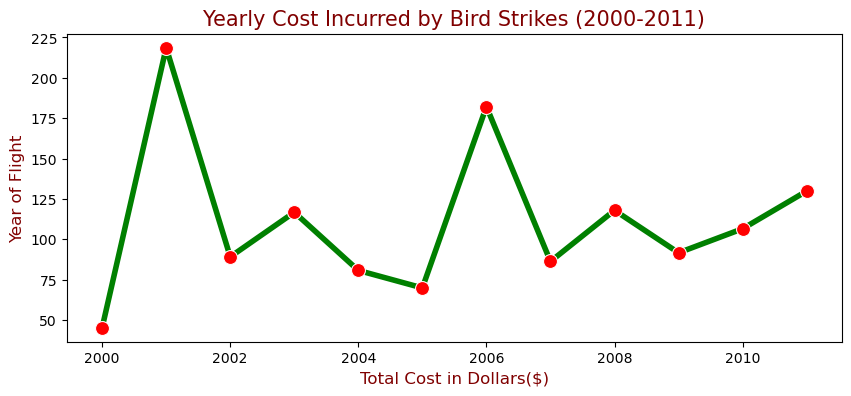

In [155]:
plt.figure(figsize=(10, 4))
res5= df.groupby('Year_of_Flight')['Cost_Total $'].sum()/100000
res5= res5.reset_index()

sns.lineplot(data=res5, x='Year_of_Flight', y='Cost_Total $', color='green', linewidth=4, marker="o", ms=10, mfc='red')

plt.title('Yearly Cost Incurred by Bird Strikes (2000-2011)', color='maroon', size=15)
plt.xlabel('Total Cost in Dollars($)', color='maroon', size=12)
plt.ylabel('Year of Flight', color='maroon', size=12)
plt.show()

### When do most bird strikes occur?

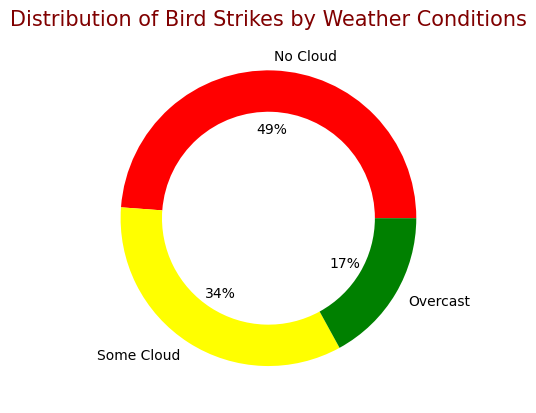

In [156]:
res6= df['Conditions_Sky'].value_counts()
colors=['red', 'yellow', 'green']
plt.pie(res6.values, labels= res6.index, autopct= "%.f%%", wedgeprops= dict(width=0.28), colors=colors)
plt.title('Distribution of Bird Strikes by Weather Conditions', color='maroon', size=15)
plt.show()

### Altitude of Aeroplanes at the time of strike

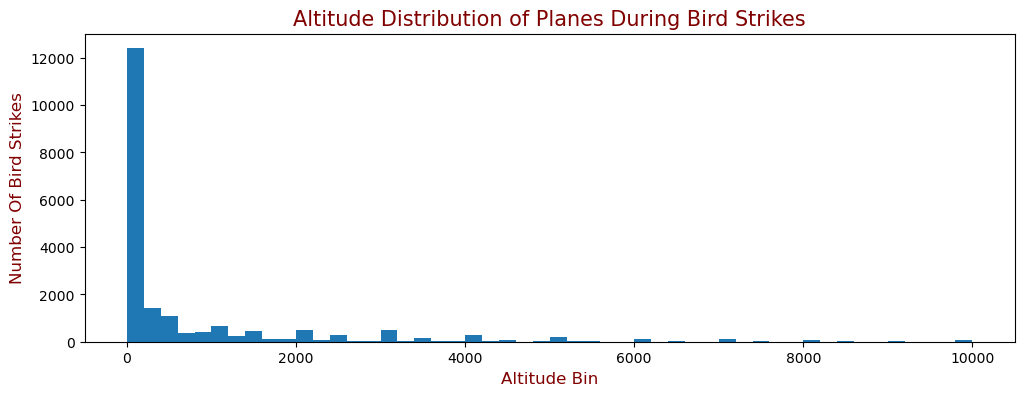

In [157]:
plt.figure(figsize=(12,4))

plt.hist(df['Feet above ground'], bins=50, range=(0, 10000))
plt.title('Altitude Distribution of Planes During Bird Strikes', color='maroon', size=15)
plt.xlabel('Altitude Bin', color='maroon', size=12)
plt.ylabel('Number Of Bird Strikes', color='maroon', size=12)
plt.show()

### Phase of flight at the time of the strike

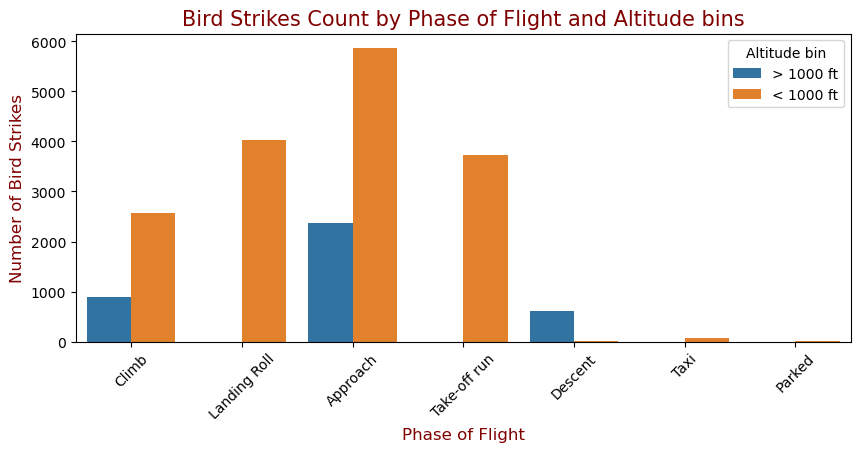

In [159]:
plt.figure(figsize=(10,4))
phase_flight_strikes = df.groupby('When_Phase of flight')['Record ID'].count()

sns.countplot(data=df, x='When_Phase of flight', hue='Altitude bin')
plt.xlabel('Phase of Flight', color='maroon', size=12)
plt.ylabel('Number of Bird Strikes', color='maroon', size=12)
plt.title('Bird Strikes Count by Phase of Flight and Altitude bins', color='maroon', size=15)
plt.xticks(rotation=45)
plt.show()

<font color='green'>

### Average Altitude of the aeroplanes in different phases at the time of strike

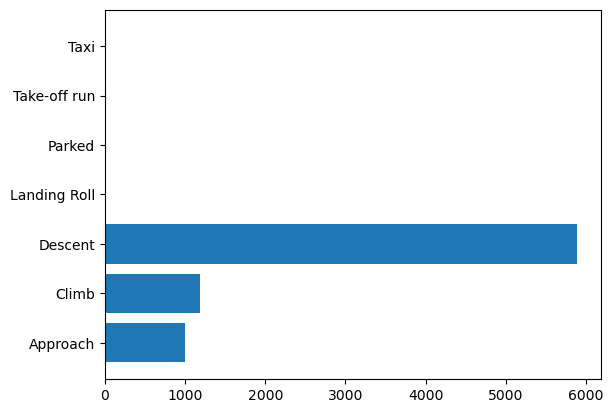

In [161]:
m= df.groupby('When_Phase of flight')['Feet above ground'].mean().reset_index()
plt.barh(y=m['When_Phase of flight'], width=m['Feet above ground'])
plt.show()

### Impact of Bird Strikes on Flights by Damage Level

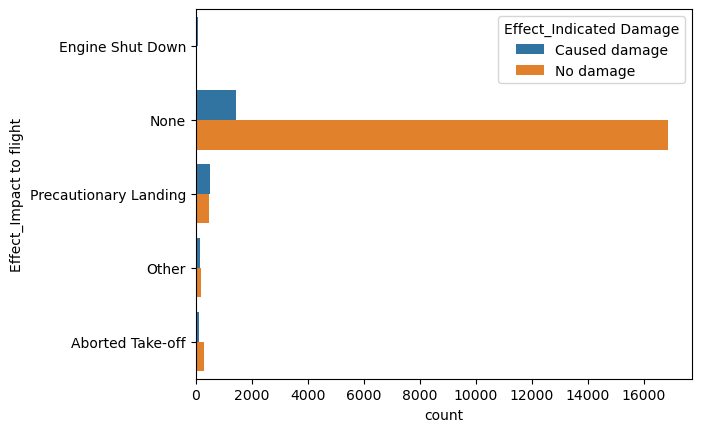

In [176]:
sns.countplot(data=df, y='Effect_Impact to flight', hue='Effect_Indicated Damage')
plt.show()

### Effect of Strike at Different Altitude

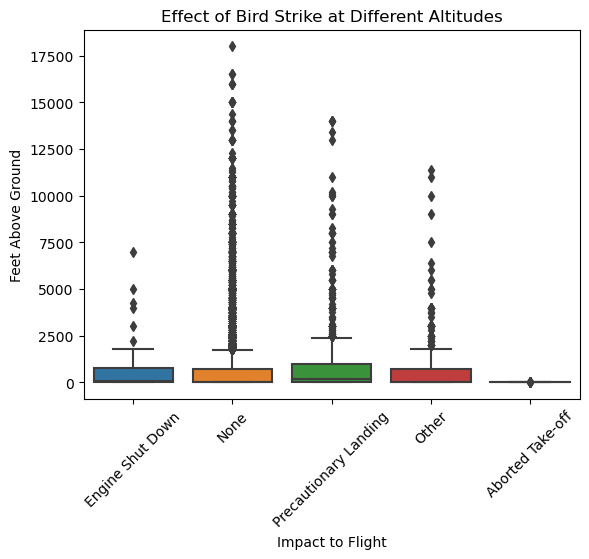

In [177]:
sns.boxplot(x='Effect_Impact to flight', y='Feet above ground', data=df)
plt.xlabel('Impact to Flight')
plt.ylabel('Feet Above Ground')
plt.title('Effect of Bird Strike at Different Altitudes')
plt.xticks(rotation=45)
plt.show()


### Were Pilots Informed? & Prior Warning and Effect of Strike Relation

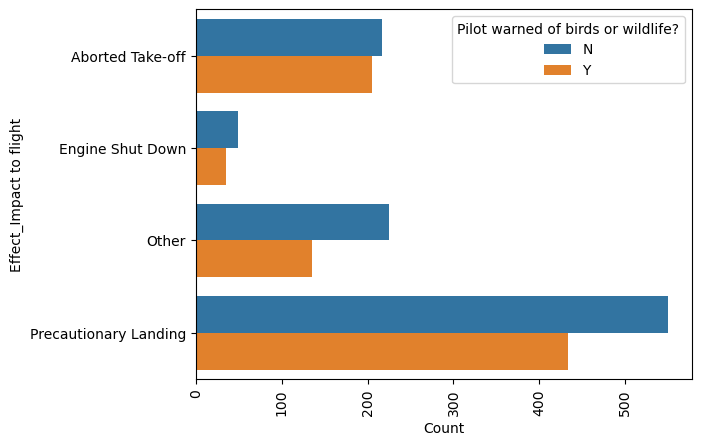

In [179]:
sns.barplot(data= res, y='Effect_Impact to flight', x='Count', hue='Pilot warned of birds or wildlife?')
plt.xticks(rotation=90)
plt.show()